In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Util import evaluate_curret, get_invest_period
from os.path import join
import os
import time
import sklearn.covariance
import pickle
from collections import namedtuple, defaultdict
from subprocess import Popen
import pandas as pd
from Util import get_std, get_IR, get_std_None_safe, get_IR_None_safe
import Util
util_loaded_data = Util.load_data()
ret, ret_nonan, univ, tradeidx, dates = util_loaded_data

hi


In [3]:
# run_name='first_server_run'
# run_info_name = "run_info/{}.info".format(run_name)
# with open(run_info_name, 'rb') as f:
#     run_info = pickle.load(f)
#     run_name = run_info['run_name']
#     KT_or_not = run_info['KT_or_not']
#     N_T_list = sorted(run_info['N_T_list'])
#     all_methods_keys = run_info['all_methods_keys']
# print(run_name, KT_or_not)
# print(N_T_list)
# print(all_methods_keys)
# all_methods_keys += ['equiweight', 'MTP2']

first_server_run False
[(100, 50), (100, 100), (100, 200), (100, 400), (100, 1260), (200, 100), (200, 200), (200, 400), (200, 800), (200, 1260), (500, 250), (500, 500), (500, 1000), (500, 1260)]
['POET', 'NLS', 'CLIME', 'old_LS', 'POET_5', 'AFM_LS', 'glasso', 'AFM_NL']


In [2]:
all_methods_keys = ['equiweight', 'CLIME', 'glasso', 'POET', 'POET_5', 'old_LS','AFM_LS', 'AFM_NL', 'NLS','MTP2']
N_T_list = [(100,1260), (200, 1260), (500, 1260)]
run_name = "first_server_run"
KT_or_not = False

In [3]:
all_results = defaultdict(dict)
# all_results[(N, T)][method_name] = [list of length 360 that is the log return of the portfolio generated by
# method_name applied to N stocks and with lookback period T]

In [4]:
for N, T in N_T_list:
    for method_name in all_methods_keys:
        save_name = 'portfolios/{}_{}_{}_{}_{}'.format(T,N,method_name,KT_or_not,run_name)
        if not os.path.exists(save_name):
            continue
        with open(save_name, 'rb') as f:
            print(save_name)
            port = pickle.load(f)
            assert len(port) == 360, (method_name, N, T)
            all_results[(N,T)][method_name] = port

portfolios/1260_100_equiweight_False_first_server_run
portfolios/1260_100_CLIME_False_first_server_run
portfolios/1260_100_glasso_False_first_server_run
portfolios/1260_100_POET_False_first_server_run
portfolios/1260_100_POET_5_False_first_server_run
portfolios/1260_100_old_LS_False_first_server_run
portfolios/1260_100_AFM_LS_False_first_server_run
portfolios/1260_100_AFM_NL_False_first_server_run
portfolios/1260_100_NLS_False_first_server_run
portfolios/1260_100_MTP2_False_first_server_run
portfolios/1260_200_equiweight_False_first_server_run
portfolios/1260_200_CLIME_False_first_server_run
portfolios/1260_200_glasso_False_first_server_run
portfolios/1260_200_POET_False_first_server_run
portfolios/1260_200_POET_5_False_first_server_run
portfolios/1260_200_old_LS_False_first_server_run
portfolios/1260_200_AFM_LS_False_first_server_run
portfolios/1260_200_AFM_NL_False_first_server_run
portfolios/1260_200_NLS_False_first_server_run
portfolios/1260_200_MTP2_False_first_server_run
portfoli

In [16]:
sample_portfolio = all_results[(100, 1260)]
print(sample_portfolio)

{'equiweight': [0.015798641668003037, 0.06786287809890777, 0.044231134192102436, 0.022269286360958263, 0.04089134775001301, -0.015927606129029333, -0.018143474862254975, 0.051238879972562365, -0.057591420911891164, 0.06861350206866366, 0.027338592046877275, -0.004658780639862571, 0.11054836305150437, 0.054327892242037934, 0.03458633454128734, -0.02032032335230226, -0.0018210460753216328, 0.03816515139146403, 0.04723466056600645, 0.008033966204733501, 0.03003348133061012, -0.2807309795657993, -0.0932741853054142, 0.15835566656010655, -0.04505603124878219, 0.06858501537132054, -0.044336100655757646, 0.014321270105778324, 0.016649079633880067, 0.032874729637113784, -0.01076974056517432, -0.046066795765546946, 0.0548626531979246, 0.033650181067755955, -0.02125860820238267, 0.016902271993365796, 0.08267581624840535, -0.01747831240606923, 0.023811577841077895, 0.05094560858451213, 0.06601892587371148, -0.019293024693505134, 0.07889896748444723, 0.036098637520170715, -0.0006706971274030851, -

In [18]:
type(sample_portfolio)

dict

In [19]:
type(sample_portfolio['equiweight'])

list

In [20]:
len(sample_portfolio['equiweight'])

360

In [5]:
def draw_graph(all_results, N, T, h_range, use_IR = False):
    get_metric = (get_IR_None_safe if use_IR else get_std_None_safe)
    method_to_portfolio = all_results[(N,T)]
    for method_name, port in method_to_portfolio.items():
        line = []
        for h in h_range:
            sub_port = port[:h]
            metric = get_metric(sub_port, verbose=False)
            line.append(metric)
        plt.plot(h_range, line, label=method_name)
    plt.ylabel(("Information Ratio" if use_IR else "Standard Deviation"))
    plt.xlabel("Length of OOS")
    plt.title("N (universe size)={}, T (lookback)={}".format(N,T))
    plt.legend()
    plt.show()

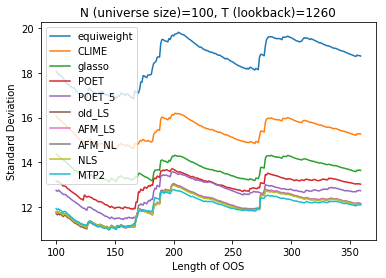

In [6]:
draw_graph(all_results, 100, 1260, range(100,360),use_IR = False)

In [11]:
def get_lines(all_results, N, T, h_range, use_IR = False):
    get_metric = (get_IR_None_safe if use_IR else get_std_None_safe)
    method_to_portfolio = all_results[(N,T)]
    method_to_lines = {}
    for method_name, port in method_to_portfolio.items():
        line = []
        for h in h_range:
            sub_port = port[:h]
            metric = get_metric(sub_port, verbose=False)
            line.append(metric)
        method_to_lines[method_name] = line
    return method_to_lines

In [13]:
dummy_lines = get_lines(all_results, 100, 1260, range(100,360) ,use_IR = False)

In [9]:
label_translate = {
    'POET': 'POET (k=3)',
    'NLS': 'NLS',
    'CLIME': 'CLIME',
    'old_LS': 'LS',
    'POET_5': 'POET (k=5)',
    'AFM_LS': 'AFM-LS',
    'AFM_NL': 'AFM-NLS',
    'glasso': 'GLASSO',
    'equiweight': '1/N',
    'MTP2': 'MTP2'
}
line_order = ['equiweight', 'CLIME', 'glasso', 'POET', 'POET_5', 'old_LS','AFM_LS', 'AFM_NL', 'NLS','MTP2']

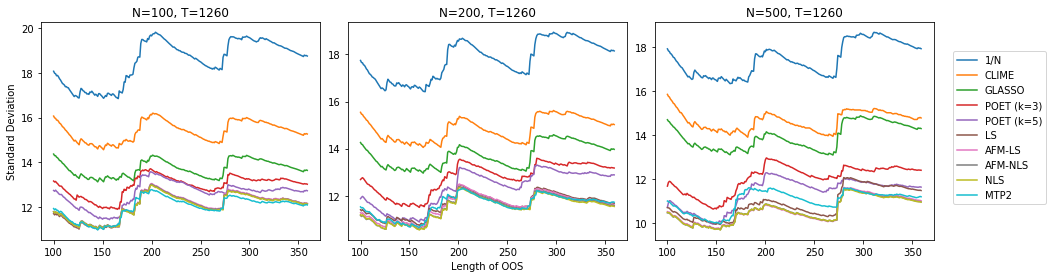

In [12]:
T = 1260
h_range = range(100,360)
#f, axes = plt.subplots(2, 3, sharex='col', sharey='row',figsize=(16,8))
f, axes = plt.subplots(1, 3,figsize=(16,4))
#f.suptitle("TITLE")
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)
row1 = axes
for N, ax in zip([100,200,500], row1):
    ax.set_title("N={}, T=1260".format(N))
    if N == 100:
        ax.set_ylabel("Standard Deviation")
    if N == 200:
        ax.set_xlabel("Length of OOS")
    lines = get_lines(all_results, N, T, h_range,use_IR = False)
    #lines = dummy_lines
    for z, name in enumerate(line_order):
        line = lines[name]
        ax.plot(h_range, line, label=label_translate[name],zorder=z)
plt.legend(bbox_to_anchor=(1.05, 0.89))
plt.show()

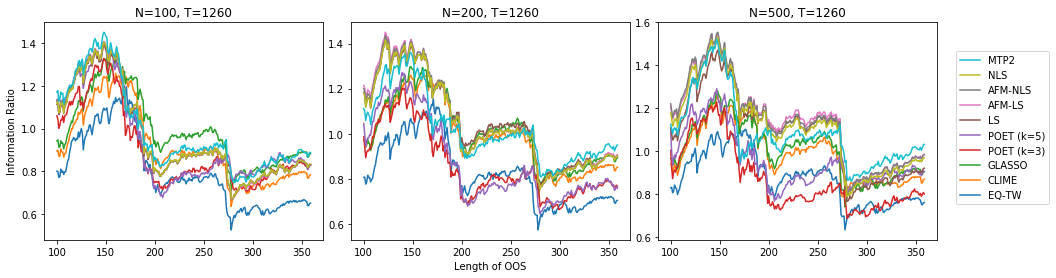

In [14]:
label_translate['equiweight'] = 'EQ-TW'
T = 1260
h_range = range(100,360)
f, axes = plt.subplots(1, 3,figsize=(16,4))
plt.subplots_adjust(wspace = 0.1, hspace = 0.3)
row1 = axes

for N, ax in zip([100,200,500], row1):
    ax.set_title("N={}, T=1260".format(N))
    if N == 100:
        ax.set_ylabel("Information Ratio")
    if N == 200:
        ax.set_xlabel("Length of OOS")
    lines = get_lines(all_results, N, T, h_range,use_IR = True)
    #lines = dummy_lines
    for z, name in enumerate(reversed(line_order)):
        line = lines[name]
        ax.plot(h_range, line, label=label_translate[name],zorder=-z,color='C{}'.format(9-z))
#f.savefig('./figures/historical_data_N_{}'.format(N))
plt.legend(bbox_to_anchor=(1.05, 0.89))
plt.show()